In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import functools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tele/Final/SB11_20172.TXT', sep='¬', engine='python')

In [ ]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_PILOPAGA
0,TI,COLOMBIA,M,22/11/1999,20172,SB11201720375526,ESTUDIANTE,COLOMBIA,No,NaN,...,49,55,A1,278,68,52.569676,NSE3,2.0,PUBLICAR,NO
1,TI,COLOMBIA,F,23/10/2000,20172,SB11201720374975,ESTUDIANTE,COLOMBIA,No,NaN,...,58,79,A2,287,73,42.479776,NSE2,2.0,PUBLICAR,NO
2,CC,COLOMBIA,M,01/11/2000,20172,SB11201720375021,ESTUDIANTE,COLOMBIA,No,NaN,...,40,20,A-,244,43,54.310264,NSE3,2.0,PUBLICAR,NO
3,TI,COLOMBIA,M,16/08/1999,20172,SB11201720374725,ESTUDIANTE,COLOMBIA,No,NaN,...,35,8,A-,187,7,48.012666,NSE2,2.0,PUBLICAR,NO
4,TI,COLOMBIA,F,21/01/2001,20172,SB11201720412450,ESTUDIANTE,COLOMBIA,No,NaN,...,55,73,A1,232,35,45.256781,NSE2,2.0,PUBLICAR,NO


In [ ]:
df = df[df['ESTU_PAIS_RESIDE'] == 'COLOMBIA']
df = df[(df['FAMI_EDUCACIONMADRE'].isna() == False) & (df['FAMI_EDUCACIONMADRE'] != 'No Aplica') & (df['FAMI_EDUCACIONMADRE'] != 'No sabe')]
df = df[(df['FAMI_EDUCACIONPADRE'].isna() == False) & (df['FAMI_EDUCACIONPADRE'] != 'No Aplica') & (df['FAMI_EDUCACIONPADRE'] != 'No sabe')]
df = df[df['FAMI_NUMLIBROS'].isna() == False]
df = df[df['FAMI_ESTRATOVIVIENDA'].isna() == False]
df = df[df['FAMI_TIENECOMPUTADOR'].isna() == False]
df = df[df['ESTU_COD_RESIDE_DEPTO'].isna() == False]
df = df[df['ESTU_COD_RESIDE_MCPIO'].isna() == False]
df = df[df['FAMI_TIENEINTERNET'].isna() == False]
df = df[(df['COLE_CARACTER'] != 'NO APLICA') & (df['COLE_CARACTER'].isna() == False)]

In [ ]:
def cambiar_numeducacion(valor):
  if valor == 'Ninguno':
    return 0
  elif valor == 'Primaria incompleta':
    return 1
  elif valor == 'Primaria completa':
    return 2
  elif valor == 'Secundaria (Bachillerato) incompleta':
    return 3
  elif valor == 'Secundaria (Bachillerato) completa':
    return 4
  elif valor == 'Técnica o tecnológica incompleta':
    return 5
  elif valor == 'Técnica o tecnológica completa':
    return 6
  elif valor == 'Educación profesional incompleta':
    return 7
  elif valor == 'Educación profesional completa':
    return 8
  elif valor == 'Postgrado':
    return 9

def cambiar_numlibros(valor):
  if valor == '0 A 10 LIBROS':
    return 0
  elif valor == '11 A 25 LIBROS':
    return 1
  elif valor == '26 A 100 LIBROS':
    return 2
  elif valor == 'MÁS DE 100 LIBROS':
    return 3

def cambiar_valor_binario(valor):
  if valor == 'Si' or valor == 'S':
    return 1
  else:
    return 0

def cambiar_estratoNum(valor):
  if valor == 'Sin Estrato':
    return 0
  elif valor == 'Estrato 1':
    return 1
  elif valor == 'Estrato 2':
    return 2
  elif valor == 'Estrato 3':
    return 3
  elif valor == 'Estrato 4':
    return 4
  elif valor == 'Estrato 5':
    return 5
  elif valor == 'Estrato 6':
    return 6


def cambiar_tcolegio_num(valor):
  if valor == 'ACADÉMICO':
    return 0
  elif valor == 'TÉCNICO/ACADÉMICO':
    return 1
  elif valor == 'TÉCNICO':
    return 2

In [ ]:
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].apply(cambiar_numeducacion)
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].apply(cambiar_numeducacion)
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].apply(cambiar_estratoNum)
df['FAMI_NUMLIBROS'] = df['FAMI_NUMLIBROS'].apply(cambiar_numlibros)
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].apply(cambiar_valor_binario)
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].apply(cambiar_valor_binario)
df['COLE_CARACTER']  = df['COLE_CARACTER'].apply(cambiar_tcolegio_num)
df.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


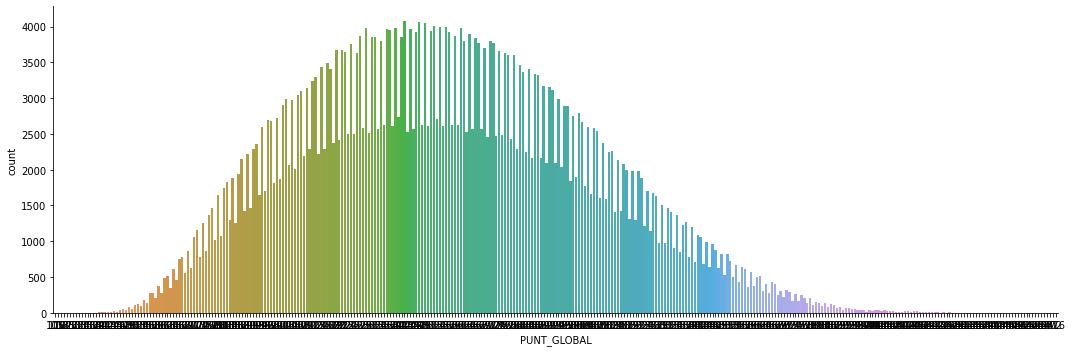

In [ ]:
sb.factorplot('PUNT_GLOBAL',data = df , kind="count", aspect=3)

In [ ]:
puntaje_promedio = df['PUNT_GLOBAL'].mean()
desviacion = df['PUNT_GLOBAL'].std()
print (f'Puntaje promedio={puntaje_promedio}, desviación={desviacion}')

def cambiar_puntaje_rango(valor):
  if valor <= (puntaje_promedio - 2 * desviacion):
    return 0
  elif valor <= (puntaje_promedio - desviacion):
    return 1
  elif valor <= (puntaje_promedio + desviacion):
    return 2
  elif valor <= (puntaje_promedio + 2 * desviacion):
    return 3
  else:
    return 4

Puntaje promedio=257.2652280499721, desviación=48.001539493137834


In [ ]:
df['PUNTAJE_RANGO'] = df['PUNT_GLOBAL'].apply(cambiar_puntaje_rango)
print(f'0<={puntaje_promedio - 2 * desviacion}\n 1<={puntaje_promedio - desviacion}\n 2<={puntaje_promedio + desviacion}\n 3<={puntaje_promedio + 2 * desviacion}\n')
df[['PUNT_GLOBAL','PUNTAJE_RANGO']]

0<=161.26214906369643
 1<=209.26368855683427
 2<=305.26676754310995
 3<=353.2683070362478



,PUNT_GLOBAL,PUNTAJE_RANGO
0,278,2
1,287,2
2,244,2
3,187,1
4,232,2
...,...,...
458491,203,1
458492,143,0
458493,178,1
458494,295,2


In [ ]:
df.shape

(458496, 83)

In [ ]:
y  = df[['PUNTAJE_RANGO']].iloc[:420000,:].values
y_pred = df[['PUNTAJE_RANGO']].iloc[420000:,:].values
x = df[['ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO','FAMI_EDUCACIONPADRE','
FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA','FAMI_NUMLIBROS', 'FAMI_TIENEINTERNET', 
'FAMI_TIENECOMPUTADOR', 'COLE_CARACTER']].iloc[:420000,:].values
x_pred = df[['ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO','FAMI_EDUCACIONPADRE','
FAMI_EDUCACIONMADRE','FAMI_ESTRATOVIVIENDA','FAMI_NUMLIBROS', 'FAMI_TIENEINTERNET', 
'FAMI_TIENECOMPUTADOR', 'COLE_CARACTER']].iloc[420000:,:].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_pred = scaler.transform(x_pred)

##K Vecinos

In [ ]:
n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
print('Accuracy of K-NN classifier on  training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on  test set: {:.2f}'.format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy of K-NN classifier on  training set: 0.68
Accuracy of K-NN classifier on  test set: 0.63
[[    0   116   443    11     0]
 [    0  2514 15423   232     3]
 [    1  4201 61493  2684   133]
 [    0   327 12415  2036   270]
 [    0    30  1735   736   197]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.35      0.14      0.20     18172
           2       0.67      0.90      0.77     68512
           3       0.36      0.14      0.20     15048
           4       0.33      0.07      0.12      2698

    accuracy                           0.63    105000
   macro avg       0.34      0.25      0.26    105000
weighted avg       0.56      0.63      0.57    105000



## K Means

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [ ]:
score=[kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score

[-290411754427511.25,
 -41495481386042.42,
 -17763627487780.113,
 -8382936518045.5,
 -5884966279143.777,
 -4245425821706.5083,
 -3072626984120.9844,
 -2010724639186.2415,
 -1323367726661.2805,
 -1120792921654.4072,
 -963884446545.2632,
 -804949271692.4778,
 -639491988656.7576,
 -508001417977.58997,
 -408377536212.5563,
 -351437499278.6726,
 -299808846632.0029,
 -253773237261.17932,
 -223585669891.6585]

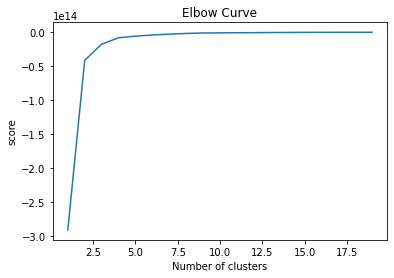

In [ ]:
plt.plot(Nc,score)
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.27736373e+00 9.43881416e+03 3.78851535e+00 4.10596397e+00
  2.19857370e+00 1.04056697e+00 6.85992453e-01 6.82235533e-01
  4.38124422e-01]
 [7.52723571e+01 7.34441865e+04 3.32841355e+00 3.63441285e+00
  1.90674921e+00 8.43494879e-01 5.44724652e-01 5.75822099e-01
  7.79731611e-01]
 [4.83743867e+01 4.86454678e+04 3.17326564e+00 3.51057388e+00
  1.69829514e+00 8.26516987e-01 4.27768462e-01 4.90450904e-01
  6.72007950e-01]
 [2.21423825e+01 2.25134931e+04 3.21066315e+00 3.51702578e+00
  1.78187975e+00 8.41232197e-01 4.35644443e-01 5.02986646e-01
  5.12434845e-01]]


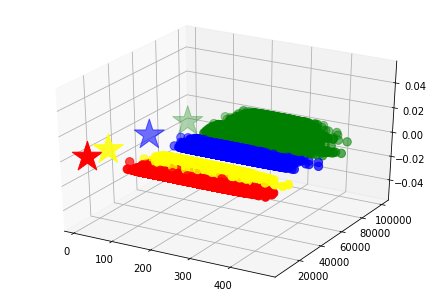

In [ ]:
labels = kmeans.predict(x)
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
'''ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)'''

f1 = df['PUNT_GLOBAL'].iloc[:420000].values
f2 = df['ESTU_COD_RESIDE_MCPIO'].iloc[:420000].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

## Redes Neuronales

In [ ]:
inputSX = x[1].shape
targetSY = y[1].shape

targetY = functools.reduce(lambda sub, ele: sub*10+ele,targetSY)
inputX= functools.reduce(lambda sub, ele: sub*10+ele, inputSX)

In [ ]:
model = Sequential()
model.add(Dense(150, input_shape=(inputX,)))
model.add(Dense(targetY))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ["categorical_accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
9844/9844 [==============================] - 20s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 2/10
9844/9844 [==============================] - 19s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 3/10
9844/9844 [==============================] - 19s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 4/10
9844/9844 [==============================] - 18s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 5/10
9844/9844 [==============================] - 18s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 6/10
9844/9844 [==============================] - 19s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 7/10
9844/9844 [==============================] - 19s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 8/10
9844/9844 [==============================] - 19s 2ms/step - loss: 2.4047e-07 - categorical_accuracy: 1.0000
Epoch 9/10
9844/9844 [==========================

In [ ]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

3282/3282 [==============================] - 6s 2ms/step - loss: nan - categorical_accuracy: 1.0000

categorical_accuracy: 100.00%


In [ ]:
xp = X_pred[35000].reshape(1, -1)
yp = y_pred[35000]
pred = knn.predict(xp)
print(f'valores{xp} esperado={yp} obtenido={pred}')
pred = model.predict(xp).round()
print(f'valores{xp} esperado={yp} obtenido={pred}')
new_labels = kmeans.predict(xp)
print(f'valores{xp} esperado={yp} obtenido={pred}')

valores[[3.90023401e-04 4.19440409e-01 5.55555556e-01 2.22222222e-01
  8.33333333e-01 6.66666667e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00]] esperado=[1] obtenido=[2]
valores[[3.90023401e-04 4.19440409e-01 5.55555556e-01 2.22222222e-01
  8.33333333e-01 6.66666667e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00]] esperado=[1] obtenido=[[0.]]
valores[[3.90023401e-04 4.19440409e-01 5.55555556e-01 2.22222222e-01
  8.33333333e-01 6.66666667e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00]] esperado=[1] obtenido=[[0.]]


*texto en cursiva*